## Customer Classification - Personal Loan

#### Overall Objective of this project is to identify the potential liability customers who could be converted to personal loan customers

Let's start with data exploratory analysis to understand the data#Import neccesary basic packages

In [1]:
#Import neccesary basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#Import Scikit packages
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score,auc
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [3]:
#Loading the input file & converting the Column Titles
cust_data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
cust_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

#### Understanding the existing dataset

In the subsequent sequel, we will be using various keywords such as head(), shape, describe etc. to understand various attributes in dataset such as datatype, number of rows & columns, null values, unique values, mean etc

In [4]:
cust_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
cust_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
cust_data.shape

(5000, 14)

In [7]:
cust_data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [8]:
cust_data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [9]:
cust_data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
pd.pivot_table(cust_data,index=['PersonalLoan'],columns=["Online"],aggfunc=np.mean)

Age                CCAvg           CDAccount            \
Online                0          1         0         1         0         1   
PersonalLoan                                                                 
0             45.198139  45.481990  1.738227  1.722755  0.002737  0.058299   
1             44.656085  45.333333  3.950370  3.876117  0.074074  0.432990   

             CreditCard           Education            ...           ID  \
Online                0         1         0         1  ...            0   
PersonalLoan                                           ...                
0              0.288451  0.297066  1.861522  1.831415  ...  2509.377668   
1              0.322751  0.281787  2.232804  2.233677  ...  2462.042328   

                               Income               Mortgage              \
Online                  1           0           1          0           1   
PersonalLoan                                                               
0             2514.056814   65.858785   66.494244  54.047619   50.257334   
1             2344.281787  141.804233  146.656357  88.105820  109.120275   

             SecuritiesAccount                 ZIPCode                
Online                       0         1             0             1  
PersonalLoan                                                          
0                     0.099617  0.103973  93094.355227  93191.827330  
1                     0.100529  0.140893  93246.809524  93092.405498  

[2 rows x 24 columns]

#### Visual Representation of the dataset 

After understanding various attributes of the dataset in text / tabular format, now let us perform visual analysis by plotting various columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA00888>,
      dtype=object)

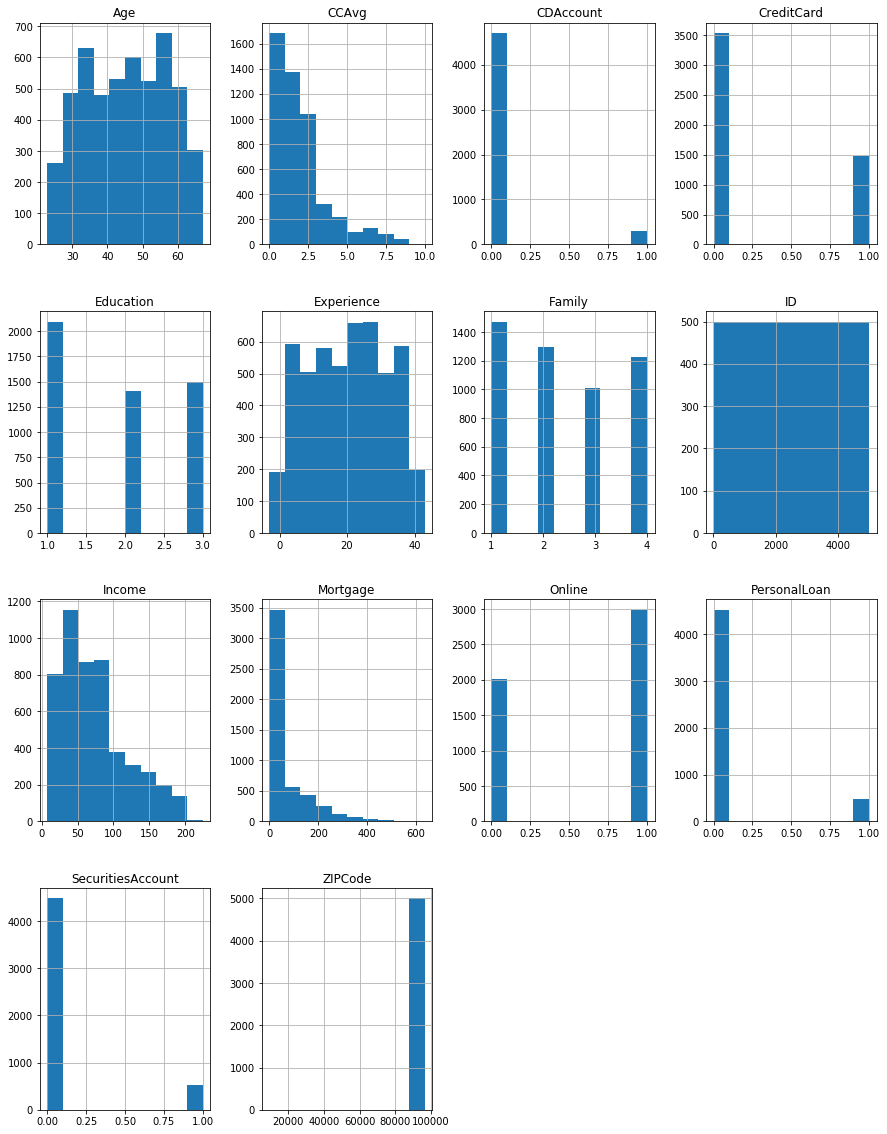

In [12]:
#Histogram
cust_data.hist(figsize=(15,20))

* From the above plots, it could be een that Age & Experience is normally distributed with most of the age ranging between 32-62 and experience ranging between 10-35.
* Income, CCAvg & Mortgage is skewed left or positively skewed
* The indicators like Securities Account, Personal Loan, Online, CD Account & Credit card shows the adoption distribution count
* Indicators like Education, Family shows the distribution count
* The remaining metrics is not taken into consideration since they do not provide any meaningful results

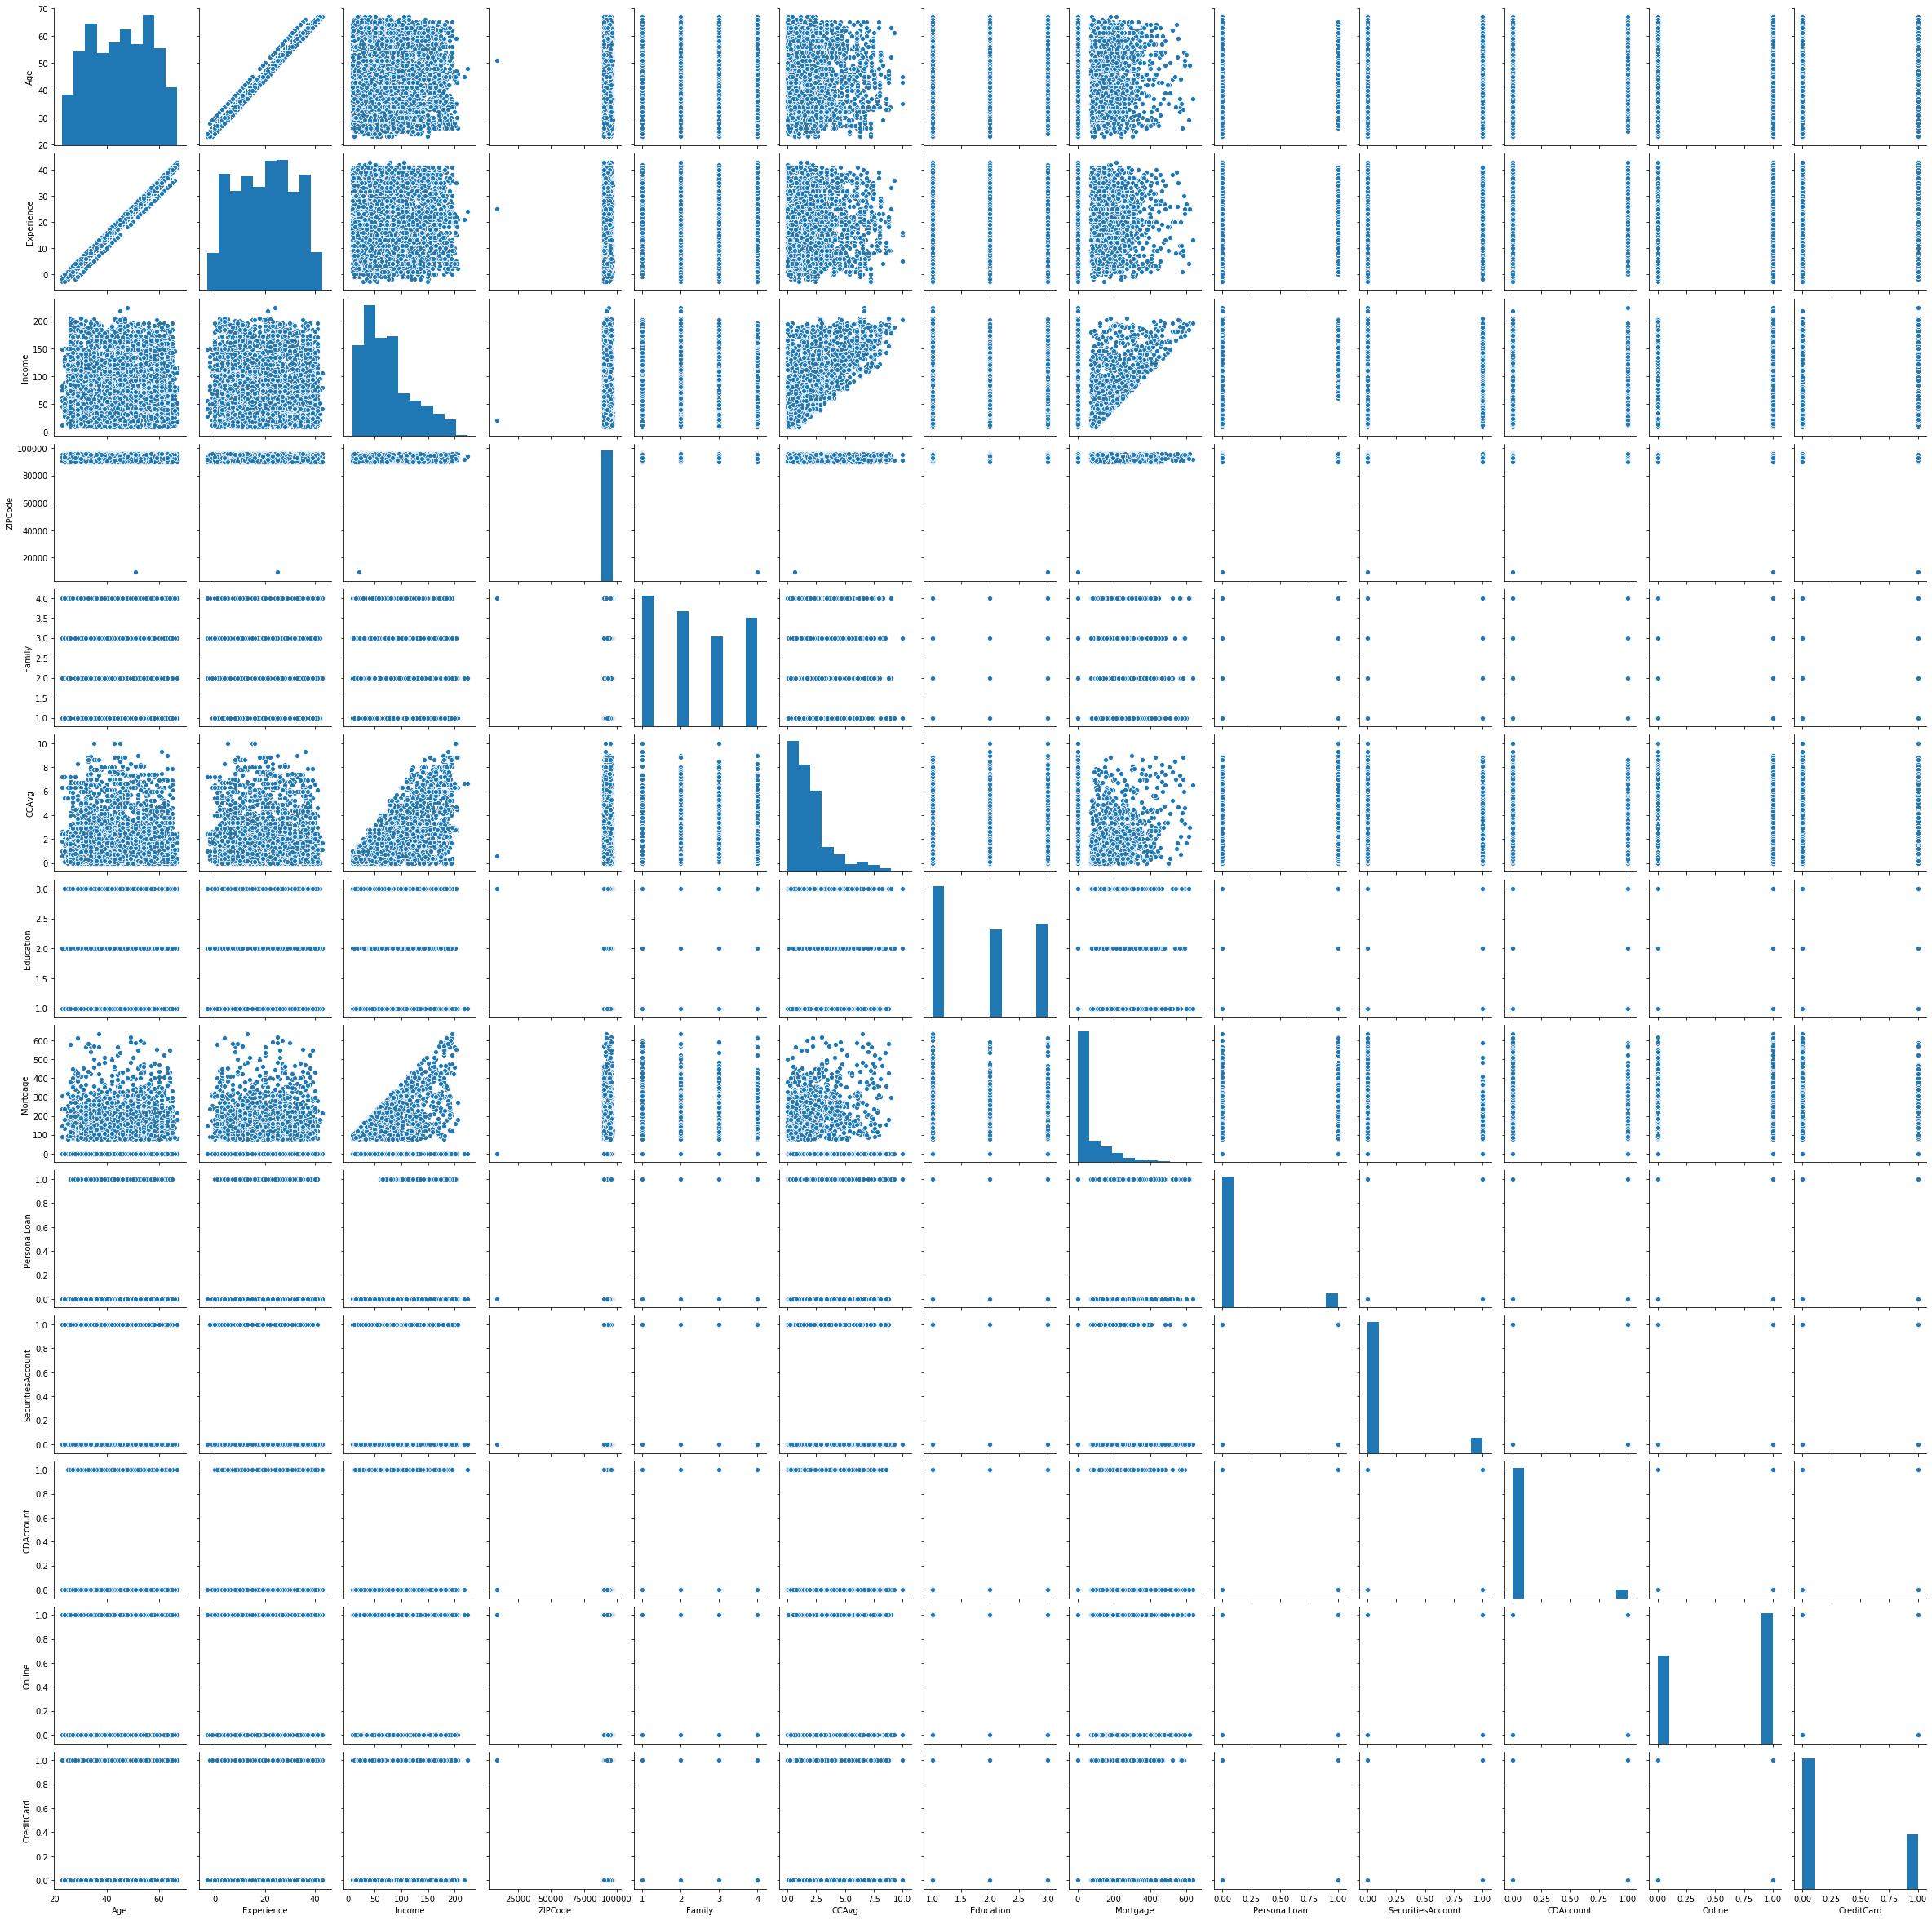

In [13]:
sns.pairplot(cust_data.iloc[:,1:])

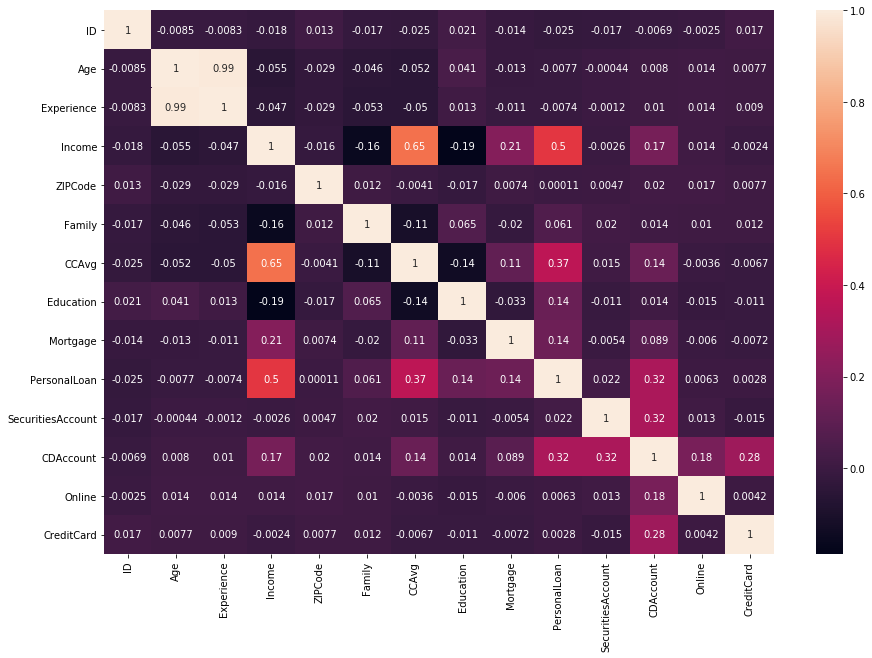

In [14]:
corr=cust_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,)

* It could be seen that Experience & Age is strongly positive correlated with coefficient of 0.99
* Other combinations like Income & CC Avg, Personal Loan & Income, Personal Loan & CC Avg, Personal Loan & Online indicator etc are also having a positive correlation to an extent
* Education & Income, Family & Income, CC Avg & Family, Mortgage & Family etc. possess a negative correlation

Having seen the correlation between various fields in the dataset, let us plot them in visual representation

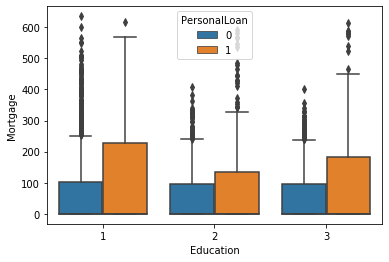

In [15]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=cust_data)

People who have personal loan have high mortgage in comparison to people with no personal loan

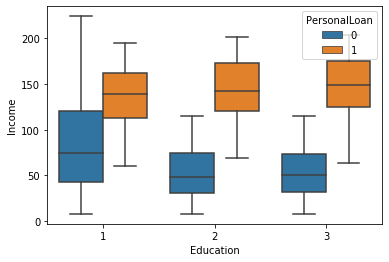

In [16]:
sns.boxplot(x="Education", y='Income', hue='PersonalLoan', data=cust_data)

It could be seen that people who has taken personal loan has same income level. 

Keeping the fact that Education 1.0 has more income range, the ratio of people who have not taken loan vs who have taken loan would be more for this category wherease the remaining 2 categpries would be almost equal

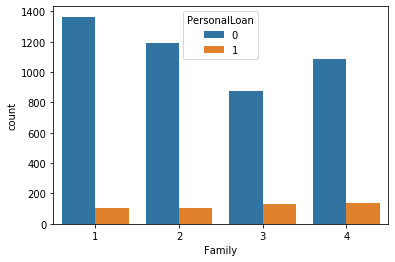

In [17]:
sns.countplot(x='Family',data=cust_data, hue='PersonalLoan')

Eventhough the count of customers who have taken loan is almost same for all the categories of people, the ratio of loan taken vs not taken is high for 3 member family

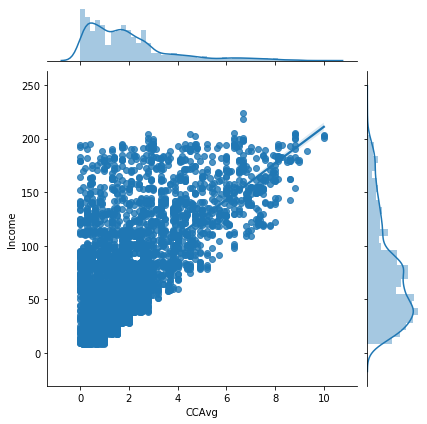

In [18]:
sns.jointplot(data=cust_data,x="CCAvg", y="Income",kind="reg")

It could be seen that there is a strong positive correlation between Income levels & credit card average expenditures

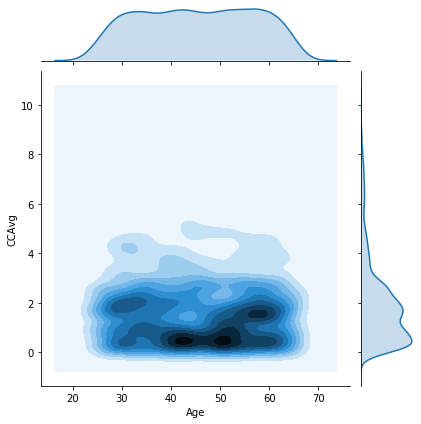

In [19]:
sns.jointplot(data=cust_data, x="Age", y="CCAvg",kind="kde")

It could be seen that there is a weak negative correlation (almost 0) between Age & credit card average expenditures

#### Data Analysis & cross-validation

After plotting various charts against Personal loan, let us do some cross validation to check if there are any anamolies in the dataset like Negative Age, Negative Experience etc.

In [20]:
(cust_data["Age"]<0).count()

5000

In [21]:
(cust_data["CCAvg"]<0).count()

5000

In [22]:
(cust_data["Income"]<0).count()

5000

In [23]:
(cust_data["Experience"]<0).count()

5000

In [24]:
 (cust_data["Mortgage"]<0).count()

5000

In [25]:
# Incorrect values can be removed from the dataset. The 52 records that had negative experience can been filtered.
# Alternative approach is to replace the negative values to median value
# We have followed this approach so that we retain the properties of other columns/attributes

In [26]:
median_exp = cust_data['Experience'].median()
neg_exp = cust_data['Experience'] < 0
cust_data[neg_exp]=np.nan
cust_data['Experience'].fillna(median_exp, inplace=True)
cust_data[cust_data['Experience'] < 0]['Experience'].count()

0

In [27]:
#Cross-check the dataset for any data loss
cust_data.shape

(5000, 14)

In [28]:
# Outliers Detection. Approach followed here is to check if there are any rows with Age / Experience > 2*standard deviations
median = cust_data['Age'].median()
std = cust_data['Age'].std()
outliers = (cust_data['Age'] - median).abs() > (std*2)
cust_data[outliers] = np.nan
cust_data['Age'].fillna(median, inplace=True)

In [29]:
median = cust_data['Experience'].median()
std = cust_data['Experience'].std()
outliers = (cust_data['Experience'] - median).abs() > (std*2)
cust_data[outliers] = np.nan
cust_data['Experience'].fillna(median, inplace=True)

In [30]:
#Cross-check the dataset for any data loss
cust_data.shape

(5000, 14)

In [31]:
cust_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
cust_data=cust_data.drop(['ID','Experience','ZIPCode'],axis=1)

In [33]:
train_set, test_set = train_test_split(cust_data,test_size=0.3 , random_state=7)

In [34]:
train_set

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
717,59.0,94.0,3.0,0.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2496,63.0,32.0,3.0,0.70,2.0,141.0,0.0,0.0,0.0,0.0,0.0
2469,43.0,89.0,1.0,0.10,2.0,307.0,0.0,0.0,0.0,0.0,1.0
1375,50.0,179.0,1.0,2.90,3.0,0.0,1.0,0.0,0.0,0.0,1.0
2742,39.0,89.0,2.0,0.40,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4307,45.0,128.0,4.0,6.00,3.0,0.0,1.0,0.0,0.0,1.0,0.0
2550,32.0,20.0,1.0,0.50,3.0,102.0,0.0,0.0,0.0,1.0,0.0
537,44.0,131.0,1.0,4.90,3.0,0.0,1.0,0.0,0.0,1.0,0.0
1220,41.0,165.0,2.0,8.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X = cust_data.loc[:, cust_data.columns != 'PersonalLoan']
y = cust_data.loc[:, cust_data.columns == 'PersonalLoan']

In [36]:
X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25.0,49.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0
1,45.0,34.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0
2,39.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,35.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0
4,35.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0


In [37]:
#Checking if there are NULLs in feature dataset
X[X.isnull() == True]

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Checking if there are NULLs in target dataset
y[y.isnull() == True]

,PersonalLoan
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4995,NaN
4996,NaN
4997,NaN
4998,NaN


In [39]:
#Replacing NA values by last observed value through 'ffill' keyword. 
#Earlier, I tried replacing the NA values with median, but the modeling didn't happen & so come up with ffill method
X.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)

C:\Users\Manikandan\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [40]:
features=X.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y.values

In [41]:
#Splitting the data into test & training in 20:80 ratio
X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=0.2, random_state=300)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

#### Perform Logistic Regression

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)

y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.952
[[895  13]
 [ 35  57]]


C:\Users\Manikandan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. 

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 

Accuracy = TP+TN/TP+FP+FN+TN = (895+57)/(891+13+35+57)

For our model, we have got 0.95 which means our model is approx. 95% accurate.

In [43]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       908
         1.0       0.81      0.62      0.70        92

    accuracy                           0.95      1000
   macro avg       0.89      0.80      0.84      1000
weighted avg       0.95      0.95      0.95      1000



Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, we have to look at other parameters to evaluate the performance of your model. 

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answers is:Of all customers that labeled as potential loan, how many actually availed? 

Precision = TP/TP+FP = 895/(895+33)=0.96
High precision relates to the low false positive rate. We have got 0.96 precision which is very good.

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the customers that truly availed, how many did we label? 

Recall = TP/TP+FN = 895/(895+13=0.99
We have got recall of 0.99 which is good for this model as it’s above 0.5.

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)
If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.97.

#### Naive Bayes Classification

In [44]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

[[835  73]
 [ 33  59]]
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       908
         1.0       0.45      0.64      0.53        92

    accuracy                           0.89      1000
   macro avg       0.70      0.78      0.73      1000
weighted avg       0.91      0.89      0.90      1000



#### K-Nearest Neibours 

In [45]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [46]:
predicted_labels = KNN.predict(X_test)

In [47]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[886  22]
 [ 59  33]]


In [48]:
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       908
         1.0       0.60      0.36      0.45        92

    accuracy                           0.92      1000
   macro avg       0.77      0.67      0.70      1000
weighted avg       0.91      0.92      0.91      1000



### Conclusion

We tried to predict if a customer could be potentially converted to Personal Loan customers. We found correlation between various factors that affect Personal Loan by plotted them in a visual format. We performed data analyhat we tsis to understand the data & also performed verification to check the correctness of the data. We split the data into training & test data & then performed Logisic Regression, Naive Bayes & KNN classification.

Of all the models that we tried, 'Logistic Regression' seems to be a better predictor. We can recommend Logistic regression to the bank for this campaign.